## IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## READING THE DATASET TO THE PYTHON ENVIRONMENT

### READING DATASET (EXCEL FILE)

In [2]:
file_path_xls = 'C:/ICTAK DSA/Assignment #02/data/iris.xls'

In [3]:
data = pd.read_excel(file_path_xls)

### CONVERTING EXCEL FILE TO CSV FILE

In [4]:
data.to_csv('iris.csv', index=False)

### READING DATASET(CSV FILE)

In [5]:
file_path_csv = 'C:/ICTAK DSA/Assignment #02/data/iris.csv'

In [6]:
df = pd.read_csv(file_path_csv)

## DISPLAYING DATASET

In [7]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## DISPLAYING THE COLUMNS IN THE DATASET

In [10]:
print("Columns in the Iris dataset") 
df.columns.tolist()

Columns in the Iris dataset


['SL', 'SW', 'PL', 'PW', 'Classification']

In [11]:
print("\nDetailed column information")
df.info()


Detailed column information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## MEAN OF EACH NUMERICAL COLUMNS IN THE DATASET

In [12]:
print(df.describe().loc['mean'])

SL    5.843333
SW    3.054000
PL    3.758667
PW    1.198667
Name: mean, dtype: float64


## CHECKING FOR NULL VALUES IN THE DATASET

In [13]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#### INFERENCE

All columns (SL, SW, PL, PW, and Classification) have 0 null values. The dataset is complete with no missing data.

## VISUALIZATION

### BAR PLOT: AVERAGE IRIS MEASUREMENTS BY SPECIES

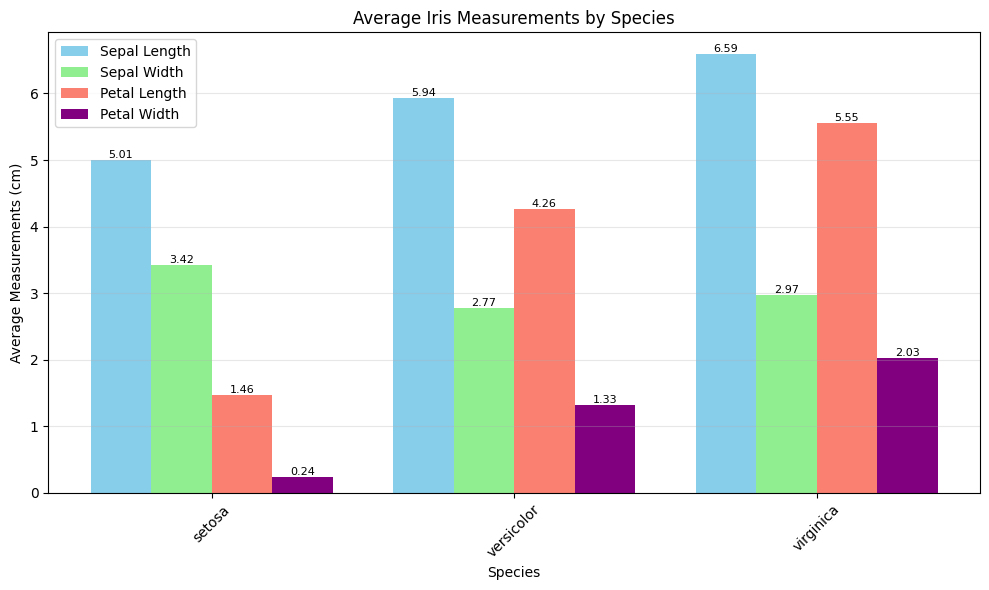

In [14]:
# Calculate mean values for each feature by species
means = df.groupby('Classification').mean()

# Create bar plot
plt.figure(figsize=(10, 6))

# Set width of bars and positions of the bars
bar_width = 0.2
r1 = range(len(means.index))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create bars and add value labels
def add_value_labels(positions, heights, offset=0):
    for pos, height in zip(positions, heights):
        plt.text(pos, height, f'{height:.2f}', 
                ha='center', va='bottom', 
                rotation=0,
                fontsize=8)

# Create bars with different colors
plt.bar(r1, means['SL'], width=bar_width, label='Sepal Length', color='skyblue')
plt.bar(r2, means['SW'], width=bar_width, label='Sepal Width', color='lightgreen')
plt.bar(r3, means['PL'], width=bar_width, label='Petal Length', color='salmon')
plt.bar(r4, means['PW'], width=bar_width, label='Petal Width', color='purple')

# Add value labels
add_value_labels(r1, means['SL'])
add_value_labels(r2, means['SW'])
add_value_labels(r3, means['PL'])
add_value_labels(r4, means['PW'])

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Average Measurements (cm)')
plt.title('Average Iris Measurements by Species')
plt.xticks([r + bar_width*1.5 for r in range(len(means.index))], 
           [name.replace('Iris-', '') for name in means.index],
           rotation=45)

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### INFERENCE

1. Iris-setosa has the shortest petals but relatively wide sepals
2. Iris-virginica generally has the largest measurements
3. Petal measurements show more variation between species than sepal measurements
4. Sepal width is the most consistent measurement across all species

### SCATTER PLOTS: SEPAL AND PETAL MEASUREMENTS COMPARISON

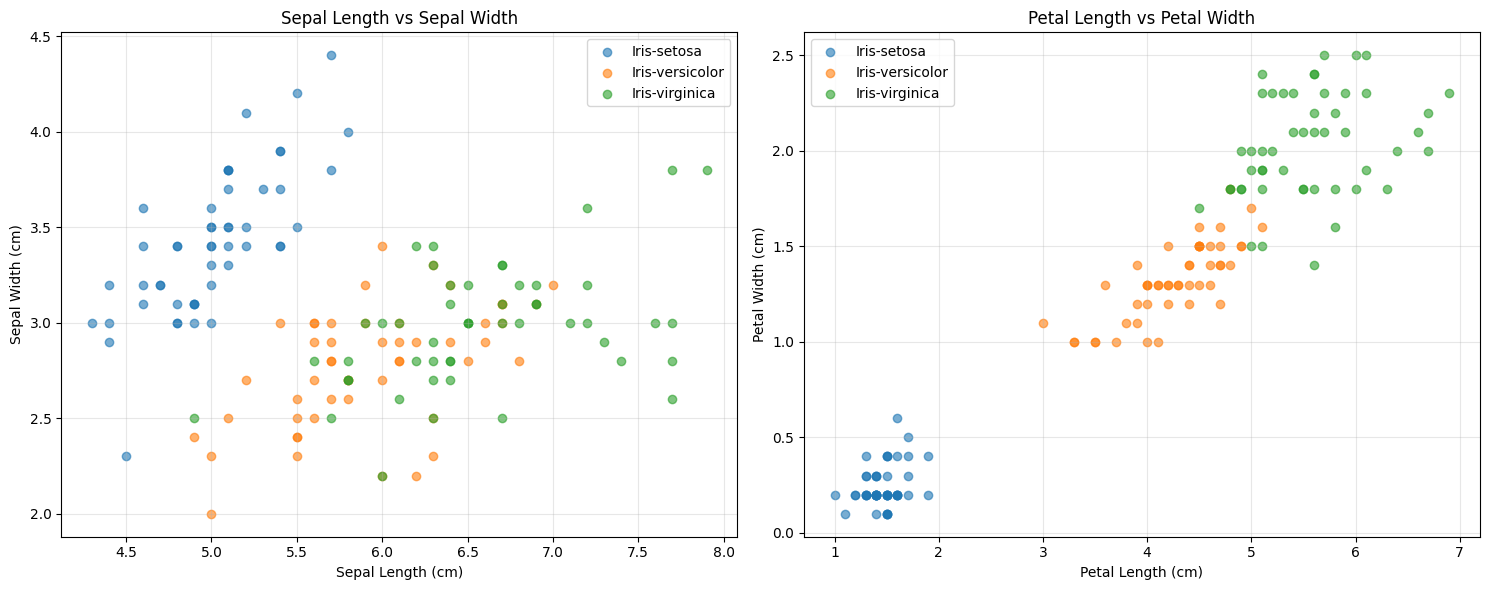

In [15]:
# Create a figure with two subplots side by side
plt.figure(figsize=(15, 6))

# First subplot: Sepal Length vs Sepal Width
plt.subplot(1, 2, 1)
for species in df['Classification'].unique():
    species_data = df[df['Classification'] == species]
    plt.scatter(species_data['SL'], species_data['SW'], label=species, alpha=0.6)

plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True, alpha=0.3)

# Second subplot: Petal Length vs Petal Width
plt.subplot(1, 2, 2)
for species in df['Classification'].unique():
    species_data = df[df['Classification'] == species]
    plt.scatter(species_data['PL'], species_data['PW'], label=species, alpha=0.6)

plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### INFERENCE

##### Sepal Length vs Sepal Width

1. Shows more overlap between species
2. Iris setosa tends to have shorter sepals but relatively wide
3. Versicolor and virginica show considerable overlap
4. Less useful for species discrimination

##### Petal Length vs Petal Width

1. Shows much clearer separation between species
2. Iris setosa forms a distinct cluster with smaller petals
3. Versicolor and virginica show some overlap but are more separable
4. Better features for species classification
5. Shows strong positive correlation between petal length and width

### BOX PLOTS: DISTRIBUTION OF IRIS MEASUREMENTS

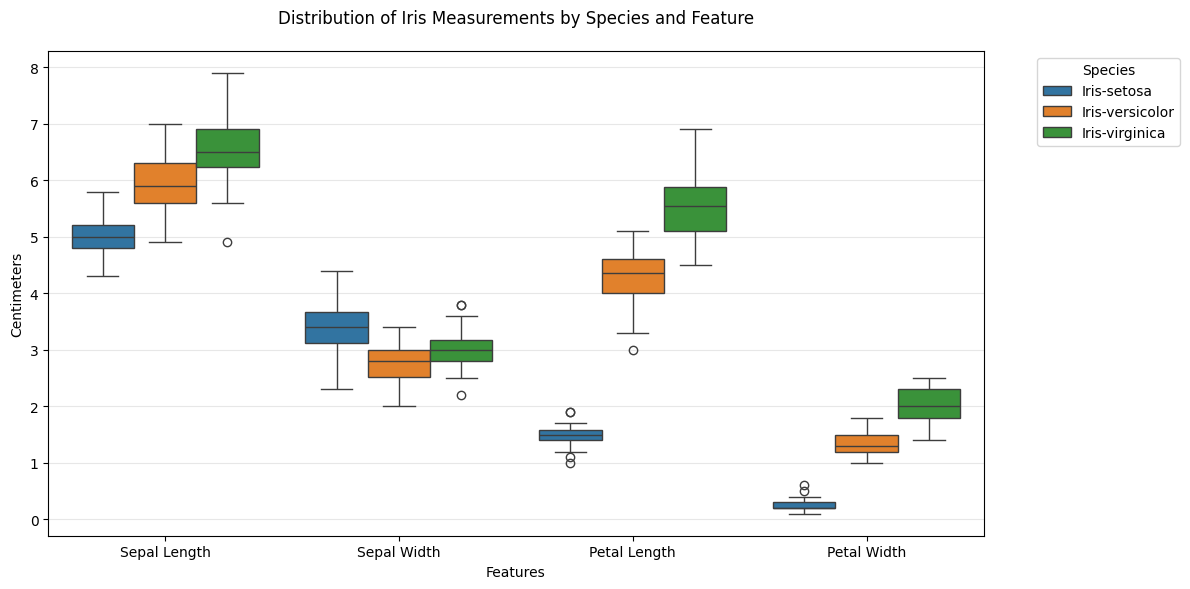

In [16]:
# Create figure with larger size
plt.figure(figsize=(12, 6))

# Create box plot
sns.boxplot(data=pd.melt(df, 
                        id_vars=['Classification'],
                        value_vars=['SL', 'SW', 'PL', 'PW']),
            x='variable',
            y='value',
            hue='Classification')

# Customize the plot
plt.title('Distribution of Iris Measurements by Species and Feature', pad=20)
plt.xlabel('Features')
plt.ylabel('Centimeters')

# Rename x-axis labels
plt.xticks(range(4), ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

# Adjust legend
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid for better readability
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### INFERENCE

1. Setosa has distinctly shorter petals
2. Virginica generally has larger measurements
3. Sepal width shows most overlap between species
4. Petal measurements show clear separation between species